![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 6.6
## Feature Encoding

### Data

**Predict the chronic kidney disease.**

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.

We use the following representation to collect the dataset 
- age	-	age	
- bp	-	blood pressure 
- sg	-	specific gravity 
- al	- albumin 
- su	-	sugar 
- rbc	-	red blood cells 
- pc	-	pus cell 
- pcc	-	pus cell clumps 
- ba	-	bacteria 
- bgr	-	blood glucose random 
- bu	-	blood urea 
- sc	-	serum creatinine 
- sod	-	sodium 
- pot	-	potassium 
- hemo	-	hemoglobin 
- pcv	-	packed cell volume 
- wc	-	white blood cell count 
- rc	-	red blood cell count 
- htn	-	hypertension 
- dm	-	diabetes mellitus 
- cad	-	coronary artery disease 
- appet	-	appetite 
- pe	-	pedal edema 
- ane	-	anemia 
- class	-	class




[Chronic Kidney Disease DataSet](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Load Data

In [35]:
# Read Data
kidney = pd.read_csv('../../DATA//kidney_disease.csv', index_col=['id'])

#### 2. Perform EDA

In [36]:
# Check Shape
kidney.shape

(400, 25)

In [37]:
# Check Head
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [38]:
# Check Data Types
kidney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe                399 non-null object
ane       

In [39]:
# Check Null Values
kidney.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [40]:
# CLean pcv
kidney['pcv'] = pd.to_numeric(kidney['pcv'], errors='coerce')

In [41]:
# CLean wc
kidney['wc'] = pd.to_numeric(kidney['wc'], errors='coerce')

In [42]:
# CLean rc
kidney['rc'] = pd.to_numeric(kidney['rc'], errors='coerce')

In [43]:
# Clean dm
kidney['dm'] = kidney['dm'].apply(lambda x: 'no' if x == '\tno' else x)
kidney['dm'] = kidney['dm'].apply(lambda x: 'yes' if x == '\tyes' else x)
kidney['dm'] = kidney['dm'].str.strip()

In [44]:
# Clean cad
kidney['cad'] = kidney['cad'].apply(lambda x: 'no' if x == '\tno' else x)

In [45]:
# Clean classification
kidney['classification'] = kidney['classification'].apply(lambda x: 'ckd' if x == 'ckd\t' else x)

In [46]:
for c in kidney.select_dtypes(np.object):
    print(c)
    print(kidney[c].value_counts())
    print('-'*50)

rbc
normal      201
abnormal     47
Name: rbc, dtype: int64
--------------------------------------------------
pc
normal      259
abnormal     76
Name: pc, dtype: int64
--------------------------------------------------
pcc
notpresent    354
present        42
Name: pcc, dtype: int64
--------------------------------------------------
ba
notpresent    374
present        22
Name: ba, dtype: int64
--------------------------------------------------
htn
no     251
yes    147
Name: htn, dtype: int64
--------------------------------------------------
dm
no     261
yes    137
Name: dm, dtype: int64
--------------------------------------------------
cad
no     364
yes     34
Name: cad, dtype: int64
--------------------------------------------------
appet
good    317
poor     82
Name: appet, dtype: int64
--------------------------------------------------
pe
no     323
yes     76
Name: pe, dtype: int64
--------------------------------------------------
ane
no     339
yes     60
Name: ane, dtype: i

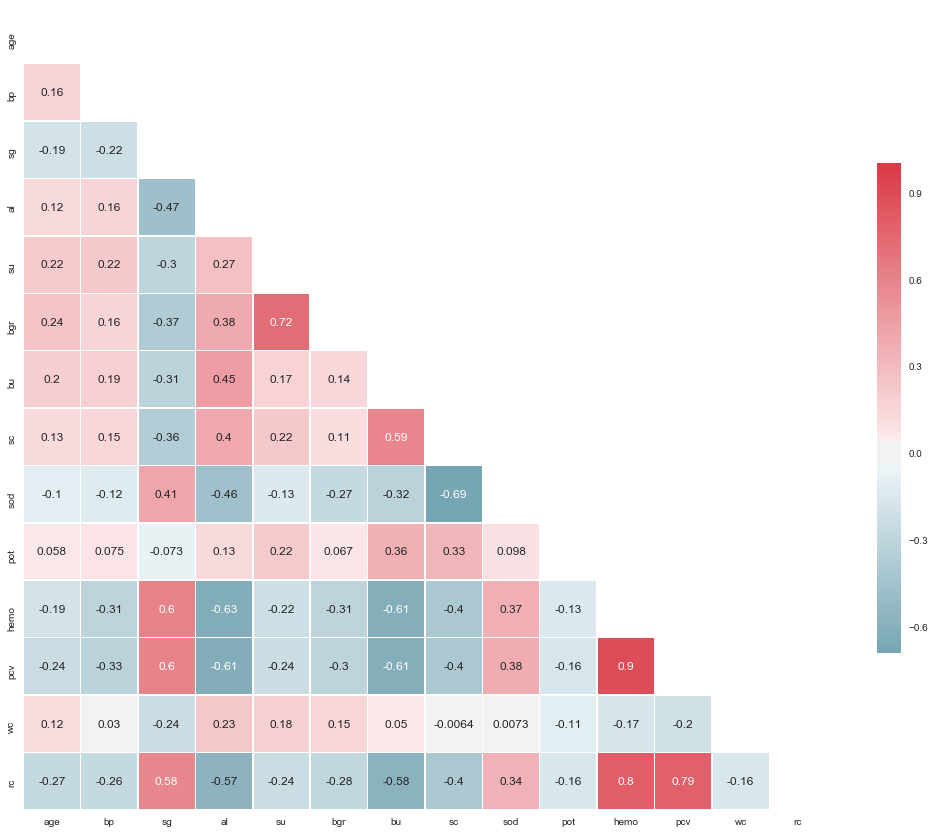

In [47]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(kidney.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(kidney.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

#### Impute Null Values

In [48]:
from sklearn.preprocessing.imputation import Imputer

In [49]:
def impute_null(df, column_name, srategy='median'):
    imputer = Imputer(missing_values = np.NaN, strategy = srategy, axis = 0)
    imputer = imputer.fit(df[[column_name]])
    return imputer.transform(df[[column_name]])

In [50]:
for l in list(kidney.select_dtypes(np.number).columns):
    kidney[l] = impute_null(kidney, l)

In [51]:
for l in list(kidney.select_dtypes(np.object).columns):
    kidney[l].fillna(kidney[l].value_counts().index[0], inplace=True)

In [52]:
kidney.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

#### 3. Label Encoder

Encode labels with value between 0 and n_classes-1.

In [21]:
# Categorical boolean mask
categorical_feature_mask = kidney.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = kidney.columns[categorical_feature_mask].tolist()

In [28]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [29]:
# apply le on categorical feature columns
kidney[categorical_cols] = kidney[categorical_cols].apply(lambda col: le.fit_transform(col))
kidney[categorical_cols].head(10)

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
5,1,1,0,0,1,1,0,0,1,0,0
6,1,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,1,0,0,1,0,0
8,1,0,1,0,1,1,0,0,0,1,0


#### 4. OneHotEncoder 

Encode categorical integer features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array.

By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually. The OneHotEncoder previously assumed that the input features take on values in the range [0, max(values)). This behaviour is deprecated.

This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

In [30]:
kidney[categorical_cols].head(10)

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
5,1,1,0,0,1,1,0,0,1,0,0
6,1,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,1,0,0,1,0,0
8,1,0,1,0,1,1,0,0,0,1,0


In [31]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False, handle_unknown='ignore') 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [32]:
# apply OneHotEncoder on categorical feature columns
kidney_ohe = ohe.fit_transform(kidney) # It returns an numpy array

In [33]:
kidney_ohe

array([[0.0e+00, 1.0e+00, 0.0e+00, ..., 4.4e+01, 7.8e+03, 5.2e+00],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 3.8e+01, 6.0e+03, 4.8e+00],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 3.1e+01, 7.5e+03, 4.8e+00],
       ...,
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 4.9e+01, 6.6e+03, 5.4e+00],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.1e+01, 7.2e+03, 5.9e+00],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.3e+01, 6.8e+03, 6.1e+00]])

#### 5. Dummy Variables

Convert categorical variable into dummy/indicator variables

In [54]:
# Get dummies
kidney = pd.get_dummies(kidney, prefix_sep='_', drop_first=True)
# X head
kidney

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,0,0,0,0,0,0,0,0
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,3.2,...,1,0,0,1,1,0,0,1,0,0
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,24.0,104.0,4.0,...,1,0,0,0,0,0,0,0,0,0
7,24.0,80.0,1.015,2.0,4.0,410.0,31.0,1.1,138.0,4.4,...,0,0,0,0,1,0,0,1,0,0
8,52.0,100.0,1.015,3.0,0.0,138.0,60.0,1.9,138.0,4.4,...,0,1,0,1,1,0,0,0,1,0


####  6. Set Target 

In [185]:
target_column = 'classification'
feature_columns = [c for c in kidney.columns if c != target_column]

In [186]:
feature_columns

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [188]:
y = kidney[target_column]
X = kidney[feature_columns]

In [189]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.000000,1.020000,1.000000,0.000000,1,1,0,0,121.000000,...,15.400000,44.000000,7800.000000,5.200000,1,1,0,0,0,0
1,7.0,50.000000,1.020000,4.000000,0.000000,1,1,0,0,148.036517,...,11.300000,38.000000,6000.000000,4.707435,0,0,0,0,0,0
2,62.0,80.000000,1.010000,2.000000,3.000000,1,1,0,0,423.000000,...,9.600000,31.000000,7500.000000,4.707435,0,1,0,1,0,1
3,48.0,70.000000,1.005000,4.000000,0.000000,1,0,1,0,117.000000,...,11.200000,32.000000,6700.000000,3.900000,1,0,0,1,1,1
4,51.0,80.000000,1.010000,2.000000,0.000000,1,1,0,0,106.000000,...,11.600000,35.000000,7300.000000,4.600000,0,0,0,0,0,0
5,60.0,90.000000,1.015000,3.000000,0.000000,1,1,0,0,74.000000,...,12.200000,39.000000,7800.000000,4.400000,1,1,0,0,1,0
6,68.0,70.000000,1.010000,0.000000,0.000000,1,1,0,0,100.000000,...,12.400000,36.000000,8406.122449,4.707435,0,0,0,0,0,0
7,24.0,76.469072,1.015000,2.000000,4.000000,1,0,0,0,410.000000,...,12.400000,44.000000,6900.000000,5.000000,0,1,0,0,1,0
8,52.0,100.000000,1.015000,3.000000,0.000000,1,0,1,0,138.000000,...,10.800000,33.000000,9600.000000,4.000000,1,1,0,0,0,1


In [101]:
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y 
- Find top 4 features
- Transform features to a DataFrame

In [190]:
# Create an instance of SelectKBest
kbest = SelectKBest(score_func=chi2, k=4)

In [192]:
# Fit 
fit = kbest.fit(X, y)

In [193]:
# Print Score 
# Find Top 4 Features
pd.DataFrame(fit.scores_, index=feature_columns)

,0
age,113.462452
bp,80.023863
sg,0.005524
al,228.067797
su,100.951947
rbc,3.754674
pc,10.696296
pcc,25.200000
ba,13.200000
bgr,2428.303583


In [194]:
# Transform X to Features
features = fit.transform(X)

In [195]:
# Transform features to a dataframe
pd.DataFrame(features) 

,0,1,2,3
0,121.000000,36.000000,1.200000,7800.000000
1,148.036517,18.000000,0.800000,6000.000000
2,423.000000,53.000000,1.800000,7500.000000
3,117.000000,56.000000,3.800000,6700.000000
4,106.000000,26.000000,1.400000,7300.000000
5,74.000000,25.000000,1.100000,7800.000000
6,100.000000,54.000000,24.000000,8406.122449
7,410.000000,31.000000,1.100000,6900.000000
8,138.000000,60.000000,1.900000,9600.000000
9,70.000000,107.000000,7.200000,12100.000000


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [196]:
# feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X, y)
print("Num Features: %d", fit.n_features_) 
print("Selected Features: %s", fit.support_) 
print("Feature Ranking: %s", fit.ranking_)

Num Features: %d 4
Selected Features: %s [False False False  True False False False False False False False False
 False False False False False False  True  True False  True False False]
Feature Ranking: %s [19 14  3  1  7 12  9 16 20 15 18  4 13  5  6 11 21 10  1  1 17  1  2  8]


In [197]:
# Print Score 
# Find Top 4 Features
pd.DataFrame(fit.support_, index=feature_columns)

,0
age,False
bp,False
sg,False
al,True
su,False
rbc,False
pc,False
pcc,False
ba,False
bgr,False
